# Применение линейной и логистической регрессии для классикации данных и поиска аномалий


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Реализуем линейную и логистическую регрессии с L2 регуляризацией.

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ 

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.

Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют регуляризацией. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу, для того чтобы сузить набор различных вариантов мы вводим дополнительные ограничения на множество искомых решений.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

В качестве метода оптимизации выберем градиентный спуск.

Общая формула для обновления весов выглядит следующим образом:

$$ w_{new} = w_{old} - \alpha * \bigtriangledown_{w} Q(w_{old})  $$

Сам функционал качества с L2-регуляризацией для батча размером n выглядит так:

$$ Q(w) = \frac{1}{n}\sum\limits_{i=1}^n L(w) + \frac{1}{c}\sum\limits_{i=1}^d w_i^2 $$

И Loss-функцию для линейной регрессии для одного объекта в батче запишем так:

$$ L(w) = (y_i - a_i)^2 $$

Тогда

$$ \bigtriangledown Q(w) = \frac{2}{n} \sum\limits_{i=1}^n (\langle\,x_i,w\rangle - y_i) x_i + \frac{2}{c}w  $$

Можно вынести константу и учитывать её при выборе $ \alpha $(но для формальной верности соотношений оставим ее в конечной формуле):

$$ \bigtriangledown Q(w) = \frac{1}{n} \sum\limits_{i=1}^n (\langle\,x_i,w\rangle - y_i) x_i + \frac{1}{c}w  $$

Тогда итоговая формула будет выглядеть так:

$$ w_{new} = w_{old} - \alpha (\frac{2}{n} \sum\limits_{i=1}^n (a_i - y_i) x_i + \frac{2}{c}w_{old}),  $$
где $ a_i = \langle\,x_i,w\rangle. $

Интуитивно градиент можно понимать так: если предсказание с использованием данной точки w получилось плохим, то нужно уйти от этой точки подальше(в сторону улучшения предсказания), и чем хуже получилось предсказание, тем сильнее надо сместиться от этого положения(это можно заключить из наличия множителя $a_i - y_i$). 

Loss-функцию для логистической регрессии для одного объекта в батче запишем так:

$$ L(w) = -(y_i loga_i - (1 - y_i) log(1 - a_i)) $$

В качестве логарифма возьмем натуральный логарифм(из тех же соотношений, что и выше), воспользуемся правилами взятия градиента от функций, раскроем скобки, сократим члены и получим следующую формулу для логистической регрессии:

$$ \bigtriangledown_{w} Q = \frac{1}{n} \sum\limits_{i=1}^n (a_i - y_i) x_i + \frac{2}{c} w $$

Для вычислений использовалась следующая формула: $\sigma'(x) = (1 - \sigma(x)) \sigma(x) $, которая легко выводится из определения.

Тогда, итоговая формула обновления весов для логистической регрессии такая:

$$ w_{new} = w_{old} - \alpha (\frac{1}{n} \sum\limits_{i=1}^n (a_i - y_i) x_i + \frac{2}{c} w_{old}),  $$
где $ a_i = \frac{1}{1 + e^{-\langle\,x_i,w\rangle}}. $

Можно заметить, что формула для логистической и линейной регрессии выглядит одинаково, различия проявляются только в алгоритме предсказания $a_i$. В данной случае интуитивная интерпретация градиента похожа на предыдущий случай, только здесь смысл в том, что чем хуже соотносится предсказанная нами вероятность отношения объекта к положительному классу и действительный класс объекта, тем больше мы должны поменять своё решение(больше сместиться от данной точки весов). 

Посмотрим, как влияет регуляризация на точное решение для весов:

Функионал качества можно представить в виде:

$$ \bigtriangledown_{w} Q(w) = 2 X^T X w - 2 X^T y $$

Возьмем второй градиент и рассмотрим гессиан:
$$ \bigtriangledown_{w}^2 Q(w) = \bigtriangledown_{w} (2 X^T X w - 2 X^T y) = 2 X X^T $$

Если расписать покомпонентно, то легко увидеть, что в матрице X X^T на главной диагонали стоят суммы квадратов признаков для объектов. С учетом условия можно воспользоваться критерием Сильвестра положительной определенности матрицы: все диагональные элементы положительны, - и заключить, что матрица $2 X X^T$ положительна определена, это является достаточным условием того, что решение является точкой минимума. 

Добавим в формулу для $\bigtriangledown_{w} Q(w)$ вектор регуляризации. Для каждого объекта добавляется сумма квадратов весов, поэтому решение формула будет следующей:

$$ Q(w) = \frac{1}{n}||X w - y || + \frac{1}{c}[\sum\limits_{i=1}^n w_i^2, ..., \sum\limits_{i=1}^n w_i^2]^T $$

Ищем точку минимума:

$$ \bigtriangledown_{w} Q(w) = 2 X^T X w - 2 X^T y + \frac{2}{c}[w_1, ..., w_n]^T = 2 X^T X w - 2 X^T y + \frac{2}{c} w = 0 $$

$$ (2 X^T X + \frac{2}{c}E) w = 2 X ^T y $$

$$ w = (X^T X + \frac{1}{c}E)^{-1} X^T y $$

Если признаки являются близки к линейно зависимым, то матрица $ X^T X $ близка к вырожденной(матрица будет плохо обусловленной), поэтому значения матрицы $(X^T X)^{-1}$ очень велики (можно вспомнить формулу для обратной матрицы, в которой элементы вычисляются с домножением на $\frac{1}{|X^T X|}$). Согласно формуле, это приведет к тому, что некоторые веса w будут очень велики, поэтому алгоритм сделает некоторые признаки более "важными" и результат алгоритма будет меняться при малейшем изменении этих признаков. Это с большой вероятностью приведет к переобучению.

Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажем, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Введем более короткие обозначения: 
$$ p_1 = p(y_i = 1 | x_i) $$
$$ p_0 = p(y_i = 0 | x_i) $$
$$ a_i = a $$

Теперь найдем точку точку минимума функции матожидания:

$$ \bigtriangledown_{w} E(L | x_i) = -p_1 \frac{\bigtriangledown_{w} a}{a} + p_0 \frac{\bigtriangledown_{w} a}{1 - a} = $$

$$ = \bigtriangledown_{w} \frac{-p_1 + p_0 a + p_1 a}{a (1 - a)} = \bigtriangledown_{w} \frac{-p_1 + a}{a (1 - a)} = $$

$$ (-p_1 + a) x_i = 0 => a = p_1 $$

Проверим, что это точка минимума:

$$ \bigtriangledown_{w}^2 E(L | x_i) = \bigtriangledown_{w} a x_i = a (1 - a) x_i * x_i > 0, тк a = p1, 0 <= p1 <= 1. $$

Таким образом, логистическая регрессия и правда предсказывает вероятности положительного класса,

Заметим, что ни для L1, ни для L2 свободный член $w_0$ не нужен, что видно из формулы $ w = (X^T X + \frac{1}{c}E)^{-1} X^T y $. Регуляризация нужна для борьбы с линейно зависимыми признаками путем улучшения обусловленности матрицы $ X^T X $ с помощью добавления дополнительного слагаемого.

***Реализуем линейную и логистическую регресиию с мини-батч градиентным спуском***

In [2]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    X_batch = np.zeros((batch_size, X.shape[1]), dtype=X.dtype)
    y_batch = np.zeros((batch_size), dtype=y.dtype)
    if shuffle:
        ind = np.random.permutation(X.shape[0])
        X = X[ind]
        y = y[ind]
    
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i : min(i + batch_size, X.shape[0])]
        y_batch = y[i : min(i + batch_size, X.shape[0])]
        yield (X_batch, y_batch)

In [3]:
def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    return 1 / (1 + np.exp(-x))


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', log_step=100):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}
        self.log_step = log_step
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        """
        
        def lin_reg_alg(x, w):
            return np.dot(x, w)
        def log_reg_alg(x, w):
            return sigmoid(np.dot(x, w))

        loss = 0
        
        if self.model_type == 'lin_reg':    
            alg = lin_reg_alg
            loss = np.sum((alg(X_batch, self.weights) - y_batch) ** 2) / X_batch.shape[0]
        
        else:
            alg = log_reg_alg
            a = alg(X_batch, self.weights)
            loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0] 
            
        loss += np.sum(self.weights ** 2) / self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        def lin_reg_alg(x, w):
            return np.dot(x, w)
        def log_reg_alg(x, w):
            return sigmoid(np.dot(x, w))
        
        alg = lin_reg_alg if self.model_type == 'lin_reg' else log_reg_alg
        loss_grad = np.sum((alg(X_batch, self.weights) - y_batch)[:, None] * X_batch, axis=0)
        
        if self.model_type == 'lin_reg':
            loss_grad *= 2
            
        regul = 2 * self.weights / self.C
        loss_grad = loss_grad / X_batch.shape[0] + regul
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
    
    def fit(self, X, y, batch_size=1, verbose=0):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype), X))
        self.weights = np.random.randn(X.shape[1])
        alpha = self.alpha
        
        if verbose:
            print('Model {}'.format('linear' if self.model_type == 'lin_reg' else 'logistic'))
            
        for n in range(0, self.max_epoch):
            
            if verbose:
                print('Epoch', n)
                
            new_epoch_generator = self.batch_generator(X, y, shuffle=True, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                if verbose:
                    if len(self.errors_log['iter']) % self.log_step == 0:
                        print('Batches {} - {}: loss: {}'.format(
                            self.errors_log['iter'][-self.log_step], 
                            self.errors_log['iter'][-1],
                            sum(self.errors_log['loss'][-self.log_step : len(self.errors_log['iter'])])
                                                                                / self.log_step))          
            if verbose:
                print()
                
            self.alpha = alpha / (n + 1)
        
        self.alpha = alpha
                    
        return self
        
    def predict(self, X, threshold=None):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        '''
        if threshold is None:
            threshold = 0.5 if self.model_type == 'log_reg' else 0
            
        X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype), X))
        y_hat = np.dot(X, self.weights[:, None]).reshape(-1)
        if self.model_type == 'lin_reg':
            y_hat = np.where(y_hat > -threshold, 1, 0)
        else:
            y_hat = np.where(sigmoid(y_hat) > threshold, 1, 0)
        
        return y_hat


Запустим обе регрессии на синтетических данных. 
 

In [4]:
def plot_decision_boundary(clf):
    w = clf.weights[:3]
    x = np.linspace(-4, 8, 2)
    y = -(w[0] + x * w[1]) / w[2]
    print('coef: ', w[0], w[1], w[2])
    plt.plot(x, y, label='{}'.format(clf.model_type))


coef:  0.002866377377011364 0.14926808001767 -0.051283056708635165
Log loss:  0.6660631865428972 

coef:  -0.2586877529716081 0.5563691582745426 0.4888901392624864
Lin Loss:  1.2270430314163008 

0.5000000000000004 0.36884727856347255 -0.1850521863088241


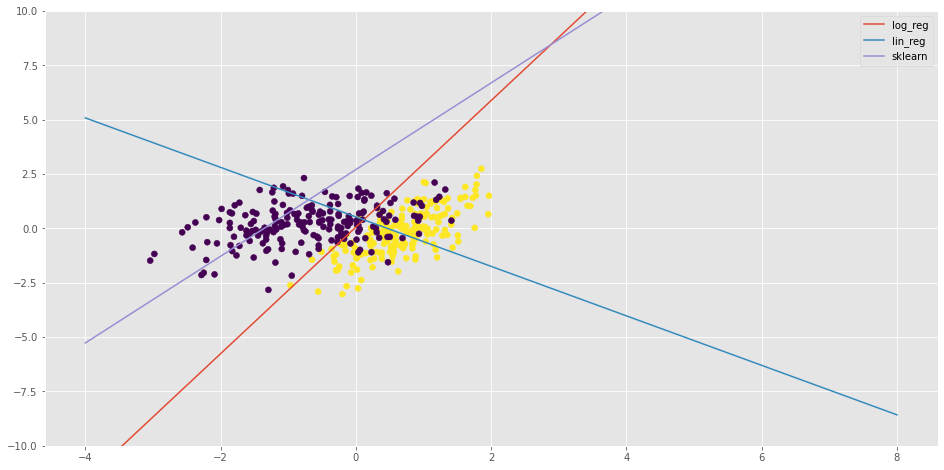

In [5]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) 

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_ylim(-10, 10)

log_clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.005, max_epoch=50)
log_clf.fit(X, y, batch_size=4, verbose=0)
plot_decision_boundary(log_clf)
print('Log loss: ', log_clf.calc_loss(np.hstack((np.ones((X.shape[0], 1)), X)), y), '\n')

lin_clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.001, max_epoch=100, C=10000)
lin_clf.fit(X, y, batch_size = 32, verbose=0)
plot_decision_boundary(lin_clf)
print('Lin Loss: ', lin_clf.calc_loss(np.hstack((np.ones((X.shape[0], 1)), X)), y), '\n')

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
w0, w1, w2 = model.intercept_, *model.coef_[:2]
print(w0, w1, w2)
xx = np.linspace(-4, 8, 2)
yy = -(w0 + w1 * xx) / w2
plt.plot(xx, yy, label='sklearn')

plt.scatter(X[:,0], X[:,1], c=y)
plt.legend()

Проанализируем алгоритм.

In [47]:
from sklearn.datasets import make_classification

In [48]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажем сходимость обеих регресий.

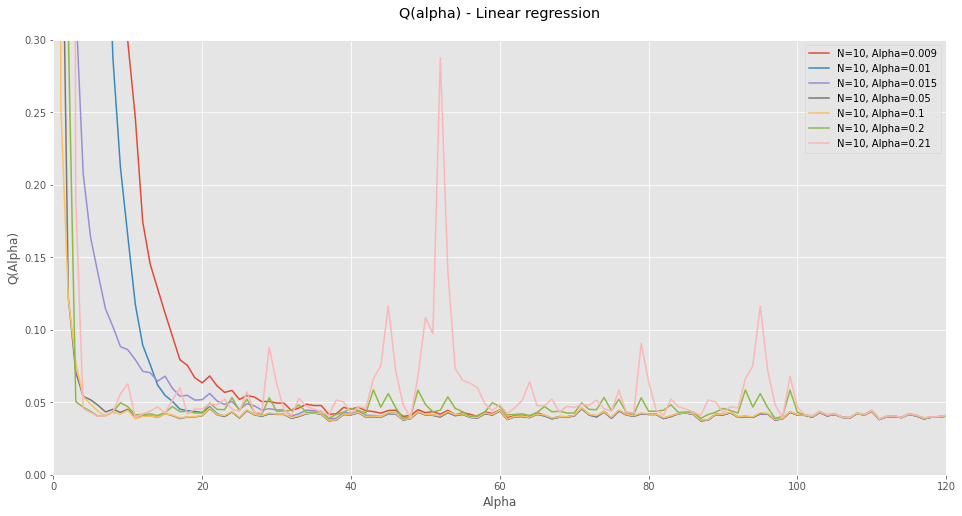

In [71]:
%%pycodestyle

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_ylim(0, 0.3)
ax.set_xlim(0, 120)
check = 100000000000000

for alp in [0.009, 0.01, 0.015, 0.05, 0.1, 0.2, 0.21]:
    lin_clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=alp, C=1000, log_step=10)
    lin_clf.fit(X, y, batch_size=200, verbose=0)
    yc = np.array([])
    for i in range(0, len(lin_clf.errors_log['loss']), lin_clf.log_step):
        sm = sum(lin_clf.errors_log['loss'][i : min(i + lin_clf.log_step, len(lin_clf.errors_log['loss']))])
        n = min(i + lin_clf.log_step, len(lin_clf.errors_log['loss'])) - i
        yc = np.append(yc, sm / n)
    xc = np.arange(yc.shape[0])
    ax.plot(xc, yc, label='N={}, Alpha={}'.format(lin_clf.log_step, lin_clf.alpha))
    
ax.set_title('Q(alpha) - Linear regression\n')
plt.xlabel('Alpha')
plt.ylabel('Q(Alpha)')
plt.legend()

Из графика можно заметить, что чем больше значение $\alpha$, тем менее стабильна функция потерь. Оптимальными значениями параметра являются значения в районе $0.009-0.1$, и чем больше это значение, тем выше скорость сходимости и тем больше вероятность того, что регрессия будет расходиться. Будем использовать $\alpha=0.05$

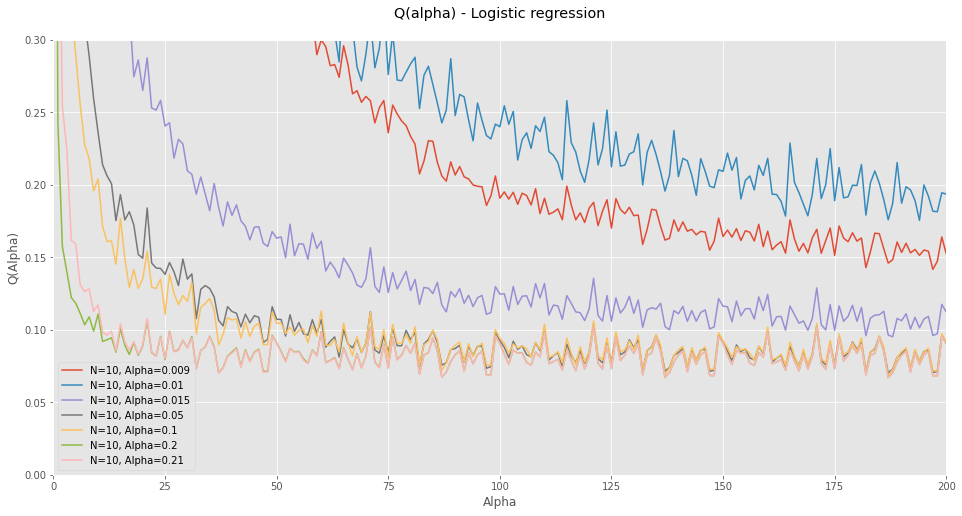

In [72]:
%%pycodestyle

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_ylim(0, 0.3)
ax.set_xlim(0, 200)
for alp in [0.009, 0.01, 0.015, 0.05, 0.1, 0.2, 0.21]:
    lin_clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=alp, C=1000, log_step=10)
    lin_clf.fit(X, y, batch_size=200, verbose=0)
    yc = np.array([])
    for i in range(0, len(lin_clf.errors_log['loss']), lin_clf.log_step):
        sm = sum(lin_clf.errors_log['loss'][i : min(i + lin_clf.log_step, len(lin_clf.errors_log['loss']))])
        n = min(i + lin_clf.log_step, len(lin_clf.errors_log['loss'])) - i
        yc = np.append(yc, sm / n)
    xc = np.arange(yc.shape[0])
    ax.plot(xc, yc, label='N={}, Alpha={}'.format(lin_clf.log_step, lin_clf.alpha))
    
ax.set_title('Q(alpha) - Logistic regression\n')
plt.xlabel('Alpha')
plt.ylabel('Q(Alpha)')
plt.legend()

В данном случае стоит смотреть в сторону $0.05-0.1$. Выберем значение $alpha=0.05$.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-32-ccb89290731c>:52: RuntimeWarning: overflow encountered in square
  loss = np.sum((alg(X_batch, self.weights) - y_batch) ** 2) / X_batch.shape[0]
<ipython-input-32-ccb89290731c>:59: RuntimeWarning: overflow encountered in double_scalars
  loss += np.sum(self.weights ** 2) / self.C
<ipython-input-32-ccb89290731c>:59: RuntimeWarning: overflow encountered in square
  loss += np.sum(self.weights ** 2) / self.C
<ipython-input-32-ccb89290731c>:96: RuntimeWarning: overflow encountered in multiply
  loss_grad *= 2
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-32-ccb89290731c>:57: Ru

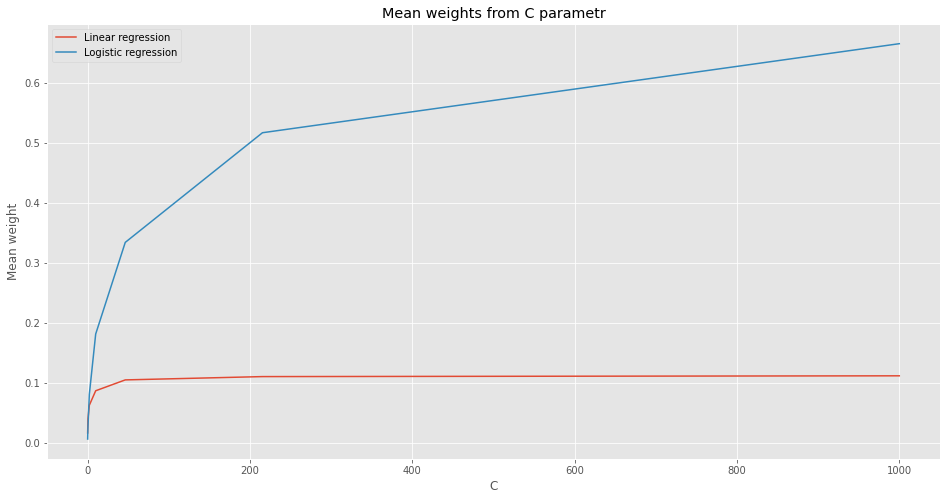

In [68]:
%%pycodestyle

lin_w = np.array([])
log_w = np.array([])
xc = np.logspace(3, -3, 10)
for c in xc:
    lin_clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.05, C=c, log_step=100)
    lin_clf.fit(X, y, batch_size=200)
    lin_w = np.append(lin_w, np.mean(np.absolute(lin_clf.weights)))
    
    log_clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.05, C=c, log_step=100)
    log_clf.fit(X, y, batch_size=200)
    log_w = np.append(log_w, np.mean(np.absolute(log_clf.weights)))
    
fig, ax = plt.subplots(figsize=(16, 8))
#ax.set_ylim(0, 0.3)
#ax.set_xlim(0, 200)

ax.plot(xc, lin_w, label='Linear regression')
ax.plot(xc, log_w, label='Logistic regression')

ax.set_title('Mean weights from C parametr')
plt.xlabel('C')
plt.ylabel('Mean weight')
plt.legend()

Веса уменьшаются.

Применим модели на отобранных текстовых данных, содержащих информацию о сайтах, их заголовках, и тематиках(для обучающей выборки) в рамках группы. Подберем лучшие параметры, обучим модель и применим ее на тестовой выборке для обнаружения тем, не отклоняющихся от тематики группы, т.е. аномальных.

In [5]:
doc_to_title = {}
with open('hw2_data/docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [6]:
import pandas as pd
train_data = pd.read_csv('hw2_data/train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [7]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [8]:
from sklearn.metrics import f1_score, make_scorer 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, cross_val_score

In [34]:
X_train0 = np.copy(X_train)

In [275]:
%%pycodestyle

# Нормализация по всей выборке
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)

In [276]:
lin_clf = MySGDClassifier(batch_generator, C=1, alpha=0.05, max_epoch=10, model_type='lin_reg')
%time lin_clf.fit(X_train, y_train, batch_size=32)

CPU times: user 282 ms, sys: 5.25 ms, total: 287 ms
Wall time: 313 ms


MySGDClassifier(alpha=0.05,
                batch_generator=<function batch_generator at 0x7fd3c30d8670>)

In [277]:
log_clf = MySGDClassifier(batch_generator, C=1, alpha=0.05, max_epoch=10, model_type='log_reg')
%time log_clf.fit(X_train, y_train, batch_size=4)

CPU times: user 2.61 s, sys: 75.5 ms, total: 2.69 s
Wall time: 2.84 s


MySGDClassifier(alpha=0.05,
                batch_generator=<function batch_generator at 0x7fd3c30d8670>,
                model_type='log_reg')

In [9]:
n_groups = 129
group_kfold = GroupKFold(n_splits=n_groups)

No handles with labels found to put in legend.


Max: 0.40588703712275254
Threshold: 0.15306122448979592


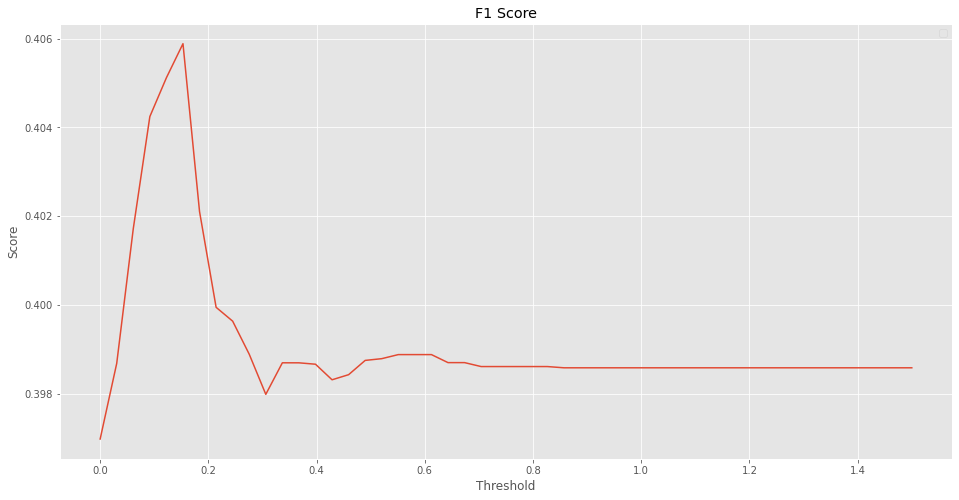

In [220]:
%%pycodestyle

fig, ax = plt.subplots(figsize=(16, 8))

ax.set_title('F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')

xc = np.linspace(0, 1.5, 50)
res = np.array([])
scaler = StandardScaler() 
for thres in xc:
    scores = np.array([])
    for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
        X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
        X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
        X_val_train = scaler.fit_transform(X_val_train)
        X_val_test = scaler.fit_transform(X_val_test)
        lin_clf.fit(X_val_train, y_val_train, batch_size=256)
        y_pred = lin_clf.predict(X_val_test, thres)
        scores = np.append(scores, f1_score(y_val_test, y_pred))
    res = np.append(res, np.mean(scores))
    
print('Max: {}\nThreshold: {}'.format(np.max(res), xc[np.argmax(res)]))

ax.plot(xc, res)
plt.legend()

<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log

<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log

Max: 0.4052095335495095
Threshold: 0.32


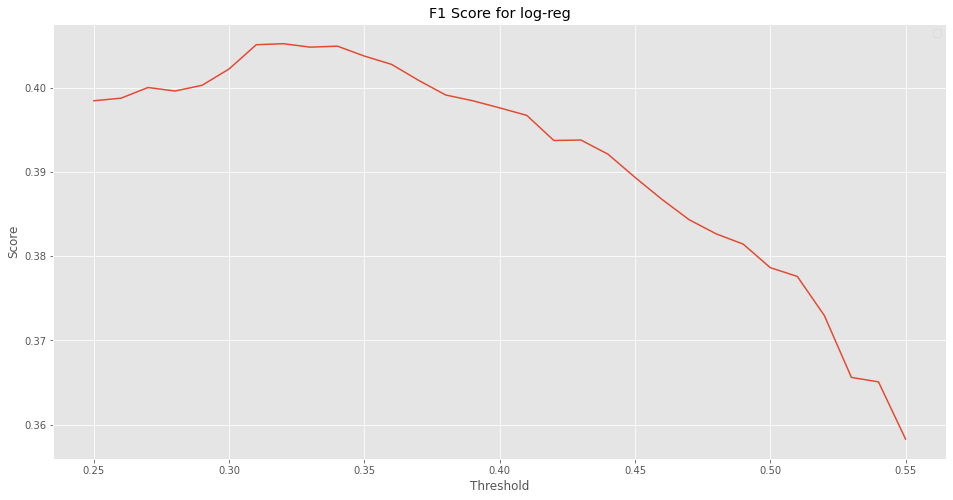

In [222]:
%%pycodestyle

fig, ax = plt.subplots(figsize=(16, 8))

ax.set_title('F1 Score for log-reg')
plt.xlabel('Threshold')
plt.ylabel('Score')

xc = np.linspace(0.25, 0.55, 31)
res = np.array([])
scaler = StandardScaler() 
for thres in xc:
    scores = np.array([])
    for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
        X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
        X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
        X_val_train = scaler.fit_transform(X_val_train)
        X_val_test = scaler.fit_transform(X_val_test)
        log_clf.fit(X_val_train, y_val_train, batch_size=256)
        y_pred = log_clf.predict(X_val_test, thres)
        scores = np.append(scores, f1_score(y_val_test, y_pred))
    res = np.append(res, np.mean(scores))
    

print('Max: {}\nThreshold: {}'.format(np.max(res), xc[np.argmax(res)]))

ax.plot(xc, res)
plt.legend()

In [37]:
log_clf = MySGDClassifier(batch_generator, C=1.0346938775510204, alpha=0.05, max_epoch=50, model_type='log_reg')

res = np.array([])
scaler = StandardScaler() 
thres = 0.313
scores = np.array([])
for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
    X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
    X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
    X_val_train = scaler.fit_transform(X_val_train)
    X_val_test = scaler.fit_transform(X_val_test)
    log_clf.fit(X_val_train, y_val_train, batch_size=256)
    y_pred = log_clf.predict(X_val_test, thres)
    scores = np.append(scores, f1_score(y_val_test, y_pred))
    
print(np.mean(scores))

Here!
0.4060157248539064


In [28]:
log_clf = MySGDClassifier(batch_generator, C=1.0346938775510204, alpha=0.05, max_epoch=50, model_type='log_reg')

res = np.array([])
scaler = StandardScaler() 
thres = 0.313
scores = np.array([])
for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
    X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
    X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
    X_val_train = scaler.fit_transform(X_val_train)
    X_val_test = scaler.fit_transform(X_val_test)
    log_clf.fit(X_val_train, y_val_train, batch_size=256)
    y_pred = log_clf.predict(X_val_test, thres)
    scores = np.append(scores, f1_score(y_val_test, y_pred))
    
print(np.mean(scores))

0.4060157248539064


Выберем оптимальные пороги:

In [10]:
lin_threshold = 0.15306122448979592
log_threshold = 0.313
log_c = 1.0346938775510204
batch_size = 256

Подберем параметры моделей.

In [225]:
scaler = StandardScaler()
scores = np.array([])
for bs in [128, 256, 512]:
    for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
        X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
        X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
        X_val_train = scaler.fit_transform(X_val_train)
        X_val_test = scaler.fit_transform(X_val_test)
        log_clf.fit(X_val_train, y_val_train, batch_size=bs)
        y_pred = log_clf.predict(X_val_test, 0.32)
        scores = np.append(scores, f1_score(y_val_test, y_pred))
    print('BS: {}\tMin: {}\tMax: {}\tMean: {}\n'.format(bs, np.min(scores), np.max(scores), np.mean(scores)))

<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 128	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40532451268147035



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 256	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40526702311548984



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4052683905815373



In [227]:
%%pycodestyle

scaler = StandardScaler()
scores = np.array([])
for ep in [10, 15, 20]:
    for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
        X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
        X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
        X_val_train = scaler.fit_transform(X_val_train)
        X_val_test = scaler.fit_transform(X_val_test)
        log_clf = MySGDClassifier(batch_generator, C=1, alpha=0.05, max_epoch=ep, model_type='log_reg')
        log_clf.fit(X_val_train, y_val_train, batch_size=batch_size)
        y_pred = log_clf.predict(X_val_test, log_threshold)
        scores = np.append(scores, f1_score(y_val_test, y_pred))
    print('BS: {}\tMin: {}\tMax: {}\tMean: {}\n'.format(bs, np.min(scores), np.max(scores), np.mean(scores)))

<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4052095335495095



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.405268830168963



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40532993356391583



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4052095335495095



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4053076523999057



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051916783779951

BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4050987197522381



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40501838130699513



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log

BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4050511541799194



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log

BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40513922760985227



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40519459117877116



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051708163343858



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051415712489407



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.405168142615928



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40518305062223753



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051687910947755



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40508516308486375



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40502134023021547



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4049493200088



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4048765362057486



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4048051906762929



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4047374983699578



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40466459581129327



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log

BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40459544019373644



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4045265604464077



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4044582551356271



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40437643886309615



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40430093360497105



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4042321658499887



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40416741207525725



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40410402488700026



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4040367696701505



No handles with labels found to put in legend.


BS: 512	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4039581101687671



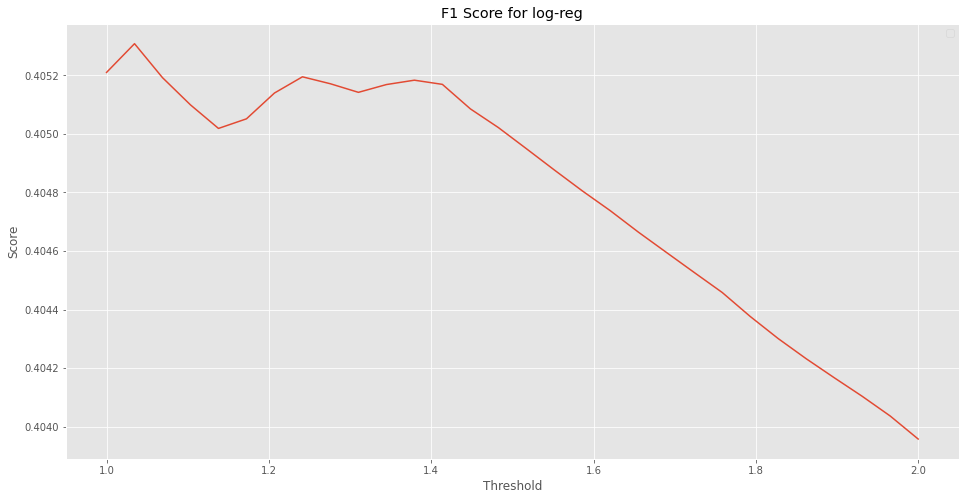

In [231]:
%%pycodestyle

fig, ax = plt.subplots(figsize=(16, 8))

ax.set_title('F1 Score for log-reg')
plt.xlabel('Threshold')
plt.ylabel('Score')

xc = np.linspace(1, 2, 30)
res = np.array([])
scaler = StandardScaler() 

scores = np.array([])
for cn in xc:
    for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
        X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
        X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
        X_val_train = scaler.fit_transform(X_val_train)
        X_val_test = scaler.fit_transform(X_val_test)
        log_clf = MySGDClassifier(batch_generator, C=cn, alpha=0.05, max_epoch=10, model_type='log_reg')
        log_clf.fit(X_val_train, y_val_train, batch_size=batch_size)
        y_pred = log_clf.predict(X_val_test, log_threshold)
        scores = np.append(scores, f1_score(y_val_test, y_pred))
    res = np.append(res, np.mean(scores))
    print('cn: {}\tMin: {}\tMax: {}\tMean: {}\n'.format(cn, np.min(scores), np.max(scores), np.mean(scores)))

ax.plot(xc, res)
plt.legend()

<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4052095335495095



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0020408163265306	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4052335365919062



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0040816326530613	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40524605242140505



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.006122448979592	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40525980927948524



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0081632653061225	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40527329727382116



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.010204081632653	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4052854827550188



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0122448979591836	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40529775180404193



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0142857142857142	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40532175157643396



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0163265306122449	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40533890078069323



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0183673469387755	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40534646252912804



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0204081632653061	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4053597941397357



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0224489795918368	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4053621326478274



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0244897959183674	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4053641113854435



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.026530612244898	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.405368080475223



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0285714285714287	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40537271638806693



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.030612244897959	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40537380943317347



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0326530612244897	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4053756895400633



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0346938775510204	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4053773607461877



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.036734693877551	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4053635250947514



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0387755102040817	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40534166452407483



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0408163265306123	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4053240101468377



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.042857142857143	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40530913488211623



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0448979591836736	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4052962812932037



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0469387755102042	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40527260868605647



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0489795918367348	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40525179660829863



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0510204081632653	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40522934197737115



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0530612244897959	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40521070270263326



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0551020408163265	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051904418044437



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0571428571428572	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051728792104142



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0591836734693878	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40515648745598676



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0612244897959184	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051426600670522

cn: 1.063265306122449	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40513211449211145

cn: 1.0653061224489797	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40512473648856545



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0673469387755103	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40511779248522806



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.069387755102041	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051132764237693



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0714285714285714	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051095803127817



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.073469387755102	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051059796921942



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0755102040816327	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40510476054768674



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0775510204081633	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051060627851748



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.079591836734694	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40510775776795027



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0816326530612246	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40510937006863923



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0836734693877552	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051109055931048



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0857142857142859	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051123696978278



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0877551020408165	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051115845591003



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0897959183673471	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051108343154273



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0918367346938775	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40511094354872296



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0938775510204082	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40510752603813865



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0959183673469388	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.4051036631214336



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]


cn: 1.0979591836734695	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40510110895397106



<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
<ipython-input-191-991aff8c2c25>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)) / X_batch.shape[0]
No handles with labels found to put in legend.


cn: 1.1	Min: 0.07228915662650602	Max: 0.9503546099290779	Mean: 0.40509577051327633

cn: 1.0346938775510204
Max: 0.4053773607461877


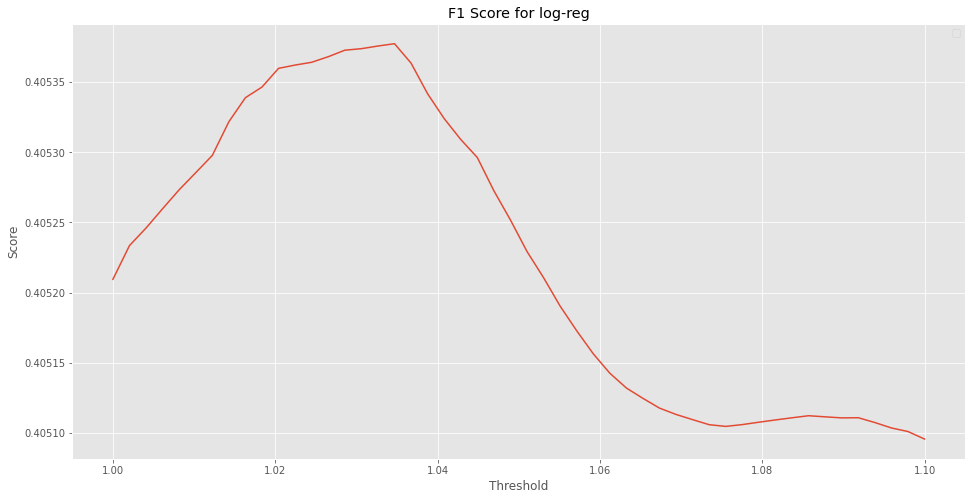

In [298]:
%%pycodestyle

fig, ax = plt.subplots(figsize=(16, 8))

ax.set_title('F1 Score for log-reg')
plt.xlabel('Threshold')
plt.ylabel('Score')

xc = np.linspace(1, 1.1, 50)
res = np.array([])
scaler = StandardScaler() 

scores = np.array([])
for cn in xc:
    for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
        X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
        X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
        X_val_train = scaler.fit_transform(X_val_train)
        X_val_test = scaler.fit_transform(X_val_test)
        log_clf = MySGDClassifier(batch_generator, C=cn, alpha=0.05, max_epoch=10, model_type='log_reg')
        log_clf.fit(X_val_train, y_val_train, batch_size=batch_size)
        y_pred = log_clf.predict(X_val_test, log_threshold)
        scores = np.append(scores, f1_score(y_val_test, y_pred))
    res = np.append(res, np.mean(scores))
    print('cn: {}\tMin: {}\tMax: {}\tMean: {}\n'.format(cn, np.min(scores), np.max(scores), np.mean(scores)))

print('cn: {}\nMax: {}'.format(xc[np.argmax(res)], np.max(res)))
ax.plot(xc, res)
plt.legend()

cn: 10000.0	Min: 0.07894736842105264	Max: 0.9080459770114943	Mean: 0.40202827433632293

cn: 32500.0	Min: 0.07894736842105264	Max: 0.9080459770114943	Mean: 0.40202827433632293

cn: 55000.0	Min: 0.07894736842105264	Max: 0.9080459770114943	Mean: 0.40202827433632293

cn: 77500.0	Min: 0.07894736842105264	Max: 0.9080459770114943	Mean: 0.402028274336323



No handles with labels found to put in legend.


cn: 100000.0	Min: 0.07894736842105264	Max: 0.9080459770114943	Mean: 0.40202827433632293



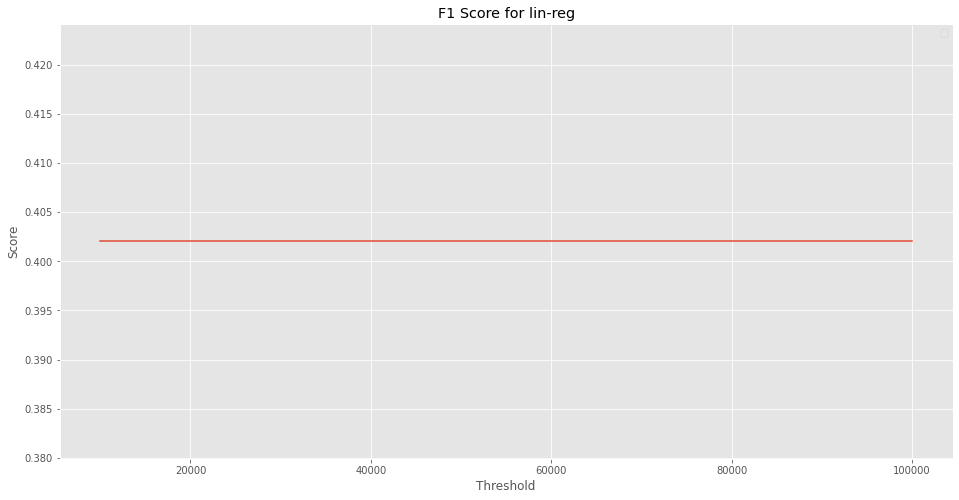

In [234]:
%%pycodestyle

fig, ax = plt.subplots(figsize=(16, 8))

ax.set_title('F1 Score for lin-reg')
plt.xlabel('Threshold')
plt.ylabel('Score')

xc = np.linspace(10000, 100000, 5)
res = np.array([])
scaler = StandardScaler() 

scores = np.array([])
for cn in xc:
    for train_index, test_index in group_kfold.split(X_train0, y_train, groups_train):
        X_val_train, y_val_train = X_train0[train_index], y_train[train_index]
        X_val_test, y_val_test = X_train0[test_index], y_train[test_index]
        X_val_train = scaler.fit_transform(X_val_train)
        X_val_test = scaler.fit_transform(X_val_test)
        lin_clf = MySGDClassifier(batch_generator, C=cn, alpha=0.05, max_epoch=10, model_type='lin_reg')
        lin_clf.fit(X_val_train, y_val_train, batch_size=batch_size)
        y_pred = log_clf.predict(X_val_test, log_threshold)
        scores = np.append(scores, f1_score(y_val_test, y_pred))
    res = np.append(res, np.mean(scores))
    print('cn: {}\tMin: {}\tMax: {}\tMean: {}\n'.format(cn, np.min(scores), np.max(scores), np.mean(scores)))

ax.plot(xc, res)
plt.legend()

Применение на тестовой выборке:

In [76]:
### old
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train)

log_clf = MySGDClassifier(batch_generator, C=1.025, alpha=0.0001, max_epoch=100, model_type='log_reg')
#log_clf = MySGDClassifier(batch_generator, C=2, alpha=0.05, max_epoch=1000, model_type='log_reg')
log_clf.fit(X_train_res, y_train, batch_size=1)

MySGDClassifier(C=1.025, alpha=0.0001,
                batch_generator=<function batch_generator at 0x7ffb32b52c10>,
                max_epoch=100, model_type='log_reg')

In [27]:
# new 
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train)

log_clf = MySGDClassifier(batch_generator, C=log_c, alpha=0.0001, max_epoch=1000, model_type='log_reg')
log_clf.fit(X_train_res, y_train, batch_size=1) 
# C=1.0346938775510204

MySGDClassifier(C=1.0346938775510204, alpha=0.0001,
                batch_generator=<function batch_generator at 0x7fde03453dc0>,
                max_epoch=1000, model_type='log_reg')

In [28]:
#import pandas as pd
train_data = pd.read_csv('hw2_data/test_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [29]:
X_test = []
groups_train = []

for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target) in enumerate(docs):
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
        
X_test = np.array(X_test)
groups_train = np.array(groups_train)

In [30]:
import csv

scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

target = log_clf.predict(X_test, threshold=0.51)

with open('hw2_data/submission.csv', 'w') as f:
    fields = ['pair_id', 'target']
    writer = csv.DictWriter(f, fieldnames=fields)
    writer.writeheader()
    pi = 11691
    for elem in target:
        writer.writerow({'pair_id': str(pi), 'target': str(elem)})
        pi += 1
        
f.close()

In [31]:
d1 = pd.read_csv('hw2_data/submission.csv')
d2 = pd.read_csv('hw2_data/best_submission.csv')

data1 = []
data2 = []

for i in range(len(d1)):
    new_doc = d1.iloc[i]
    doc_group = new_doc['pair_id']
    target = new_doc['target']
    data1.append(int(target))

for i in range(len(d2)):
    new_doc = d2.iloc[i]
    doc_group = new_doc['pair_id']
    target = new_doc['target']
    data2.append(int(target))
              
data1 = np.array(data1)
data2 = np.array(data2)

print(np.sum(np.absolute(data1 - data2)))

43


По итогам предсказания, мера F1 показала результат в 61%, что достаточно хорошо для выбранного метода определения и сравнения тематики сайтов.